In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [21]:
# Load the CSV file
data = pd.read_csv("C:/Users/hp/Desktop/railway_coal.csv")

# Display the first few rows of the DataFrame
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

  country country_lo                                    name   gppd_idnr  \
0     ITA      Italy  Andrea Palladio power station (FUSINA)  WRI1002885   
1     ITA      Italy             Brindisi Nord power station  WRI1002854   
2     ITA      Italy              Brindisi Sud power station  WRI1002855   
3     ITA      Italy               Fiume Santo power station  WRI1002884   
4     ITA      Italy                 La Spezia power station  WRI1002900   

   capacity_m  latitude  longitude primary_fu  other_fuel  other_fu_1  ...  \
0       976.0   45.4314    12.2468       Coal         NaN         NaN  ...   
1       640.0   40.6432    17.9802       Coal         NaN         NaN  ...   
2      2640.0   40.5632    18.0318       Coal         NaN         NaN  ...   
3       640.0   40.8461     8.3068       Coal         NaN         NaN  ...   
4      1300.0   44.1118     9.8743       Coal         NaN         NaN  ...   

   FCO_DESCRI  FID_countr  ISO ISOCOUNTRY  n     distance     feature_x  \

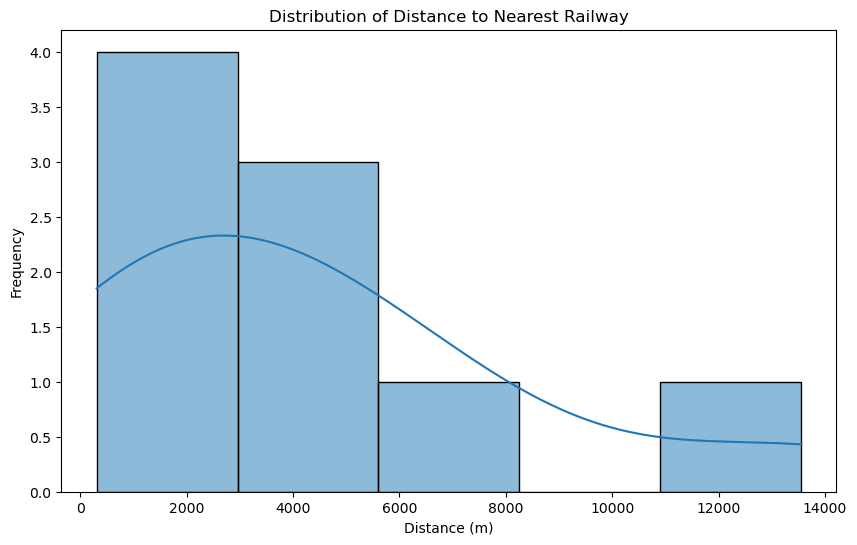

In [22]:
# Visualize the distribution of distance to nearest railway
plt.figure(figsize=(10, 6))
sns.histplot(data['distance'], kde=True)
plt.title('Distribution of Distance to Nearest Railway')
plt.xlabel('Distance (m)')
plt.ylabel('Frequency')
plt.show()

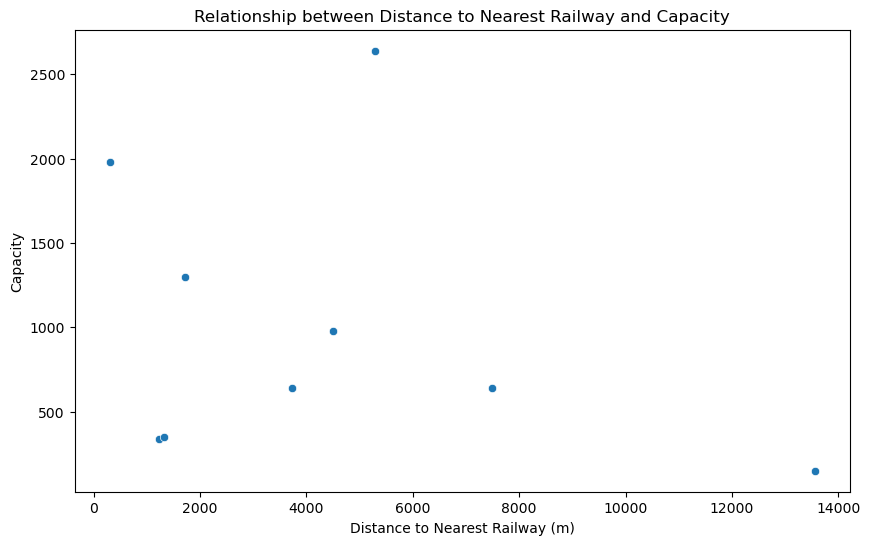

In [23]:
# Visualize the relationship between distance to nearest railway and capacity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance', y='capacity_m', data=data)
plt.title('Relationship between Distance to Nearest Railway and Capacity')
plt.xlabel('Distance to Nearest Railway (m)')
plt.ylabel('Capacity')
plt.show()

In [24]:
# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(data['distance'], data['capacity_m'])
print("Correlation coefficient between distance to nearest railway and capacity:", correlation)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The correlation between distance to nearest railway and capacity is statistically significant (p < 0.05).")
else:
    print("The correlation between distance to nearest railway and capacity is not statistically significant (p >= 0.05).")

if correlation > 0:
    print("There is a positive correlation between distance to nearest railway and capacity.")
elif correlation < 0:
    print("There is a negative correlation between distance to nearest railway and capacity.")
else:
    print("There is no linear correlation between distance to nearest railway and capacity.")

Correlation coefficient between distance to nearest railway and capacity: -0.28479441642163694
P-value: 0.4576184410451407
The correlation between distance to nearest railway and capacity is not statistically significant (p >= 0.05).
There is a negative correlation between distance to nearest railway and capacity.


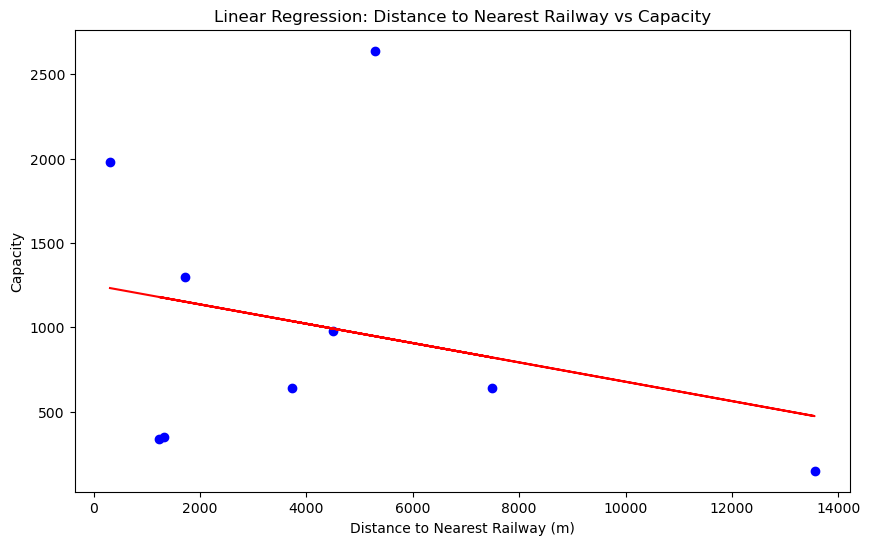

In [25]:
# Perform linear regression
from sklearn.linear_model import LinearRegression

X = data[['distance']]
y = data['capacity_m']

model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.title('Linear Regression: Distance to Nearest Railway vs Capacity')
plt.xlabel('Distance to Nearest Railway (m)')
plt.ylabel('Capacity')
plt.show()
